In [4]:
import pandas as pd
import numpy as np

heart_df = pd.read_csv('data/heart.csv')

x = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [7]:
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Skl GBM": GradientBoostingClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

for model_name, model in classifiers.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_test, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)

results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

,Model,Accuracy,Bal Acc.,Time
1,SVM,86.885246,85.947712,0.002999
2,Logistic Regression,85.245902,84.477124,0.002000
3,Skl GBM,83.606557,83.006536,0.049010
4,Random Forest,81.967213,81.535948,0.090918
5,Decision Tree,75.409836,75.272331,0.001000


<AxesSubplot:>

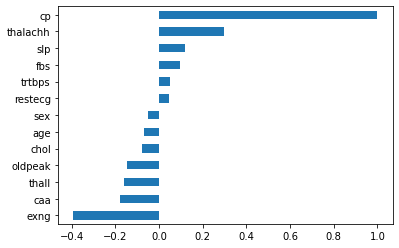

In [8]:
import matplotlib.pyplot as plt
x.corr()['cp'].sort_values().plot.barh()
num_columns = ['trtbps', 'age', 'chol', 'thalach']
